# DB에 있는 유기동물 정보 활용하기

공공데이터포털에서 가져온 데이터를 활용해 봅시다.

SQL을 잘 쓰면 신세계가 열리는 걸 확인할 수 있습니다.

## 라이브러리 사용

In [1]:
# sqlite3 사용

import sqlite3

sqlite3.version

'2.6.0'

In [2]:
# Pandas 사용

import pandas as pd

pd.__version__

'0.25.0'

In [3]:
# Matplotlib 사용

import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.1.0'

In [4]:
# matplotlib에 “AppleGothc”(Mac) 또는 “Malgun Gothic”(Windows) 글꼴 적용

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

## DB 접속

In [5]:
# 파일로 기록되는 데이터베이스에 연결/접속

connection = sqlite3.connect('test.db')

In [6]:
# Row를 사용하는 커서 얻기

connection.row_factory = sqlite3.Row

cursor = connection.cursor()

## 데이터 확인

In [9]:
# 데이터 갯수 확인

cursor.execute('SELECT COUNT(id) AS count FROM animals')

row = cursor.fetchone()

row['count']

91717

In [10]:
# 데이터 10개만 얻기

cursor.execute('SELECT * FROM animals LIMIT 10')

rows = cursor.fetchall()

pd.DataFrame(rows, columns=rows[0].keys()) # 필드 이름이 없으니까 컬럼이름을 잡아주기 위해서 rowp[0].keys()를 넣어준다. 

,id,age,colorCd,happenDt,kindCd,orgNm,sexCd,weight
0,1,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,F,1(Kg)
1,2,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,M,1(Kg)
2,3,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,M,1(Kg)
3,4,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,F,1(Kg)
4,5,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,F,1(Kg)
5,6,2019(년생),흰색,20191014,[개] 미텔 스피츠,경상남도 사천시,M,1(Kg)
6,7,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,F,1(Kg)
7,8,2019(년생),흰색,20191014,[개] 믹스견,경상남도 창원시 진해구,M,0.7(Kg)
8,9,2019(년생),흰,20191014,[개] 믹스견,경상남도 창원시 진해구,M,0.8(Kg)
9,10,2019(년생),흰+갈+검,20191014,[개] 믹스견,경상남도 창원시 진해구,M,0.9(Kg)


## GROUP BY

In [17]:
# age를 이용해 갯수 세기

sql = '''
SELECT age, COUNT(id) AS count
    FROM animals
    GROUP BY age
    ORDER BY count DESC
'''
 # 큰 값부터 나오게 하기, sql로 우리가 배운 거 써서 이제 가져올 수 있음 
cursor.execute(sql)

rows = cursor.fetchall()

# SQL에서 얻은 결과를 Pandas에서 사용하는 건 너무 쉽습니다.

df = pd.DataFrame(rows, columns=rows[0].keys())

df

,age,count
0,2019(년생),46722
1,2018(년생),11156
2,2017(년생),10844
3,2016(년생),8497
4,2014(년생),4050
5,2015(년생),3808
6,2013(년생),2002
7,2009(년생),1224
8,2012(년생),1224
9,2011(년생),1119


In [12]:
# age를 index로 지정

df.set_index('age')

,count
age,
2019(년생),46722
2018(년생),11156
2017(년생),10844
2016(년생),8497
2014(년생),4050
2015(년생),3808
2013(년생),2002
2009(년생),1224
2012(년생),1224


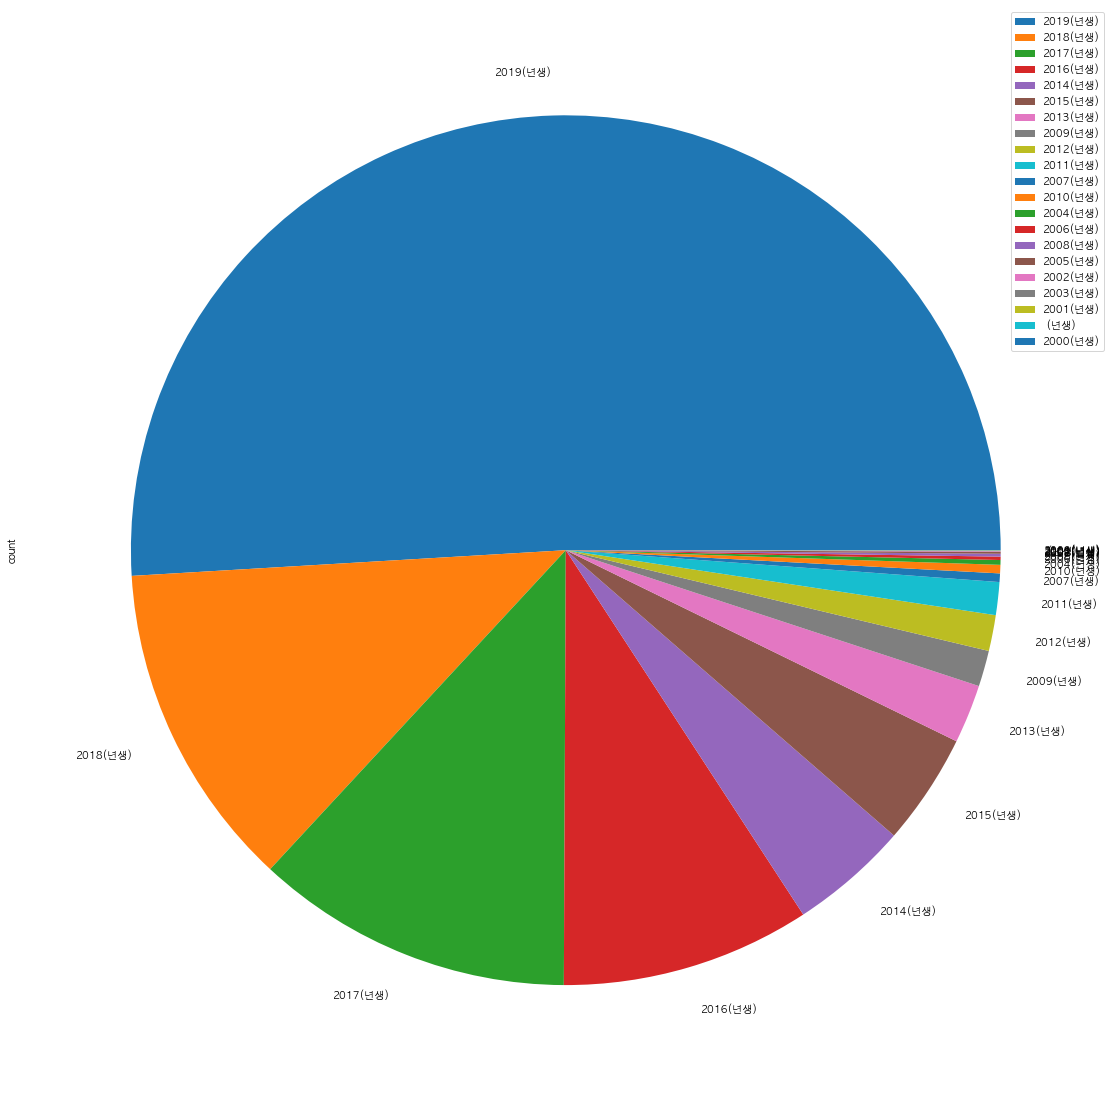

In [13]:
# 파이 차트 그리기

df.set_index('age').plot.pie(y='count', figsize=(20, 20))

plt.show()

In [12]:
# “경기도” orgNm 갯수 세기 (where절 비슷하넹)

sql = '''
SELECT orgNm, COUNT(id) AS count
    FROM animals
    WHERE orgNm LIKE ?
    GROUP BY orgNm
    ORDER BY count DESC
'''
# db로 구축해서 하면 많은 양의 데이터도 금방 나옴! 
# ? 를 써야 안전함!!! 잊지말기 (직접 작성하지 않고 ? 쓴 후 밑에 execute로 잡아주기 - 실수방지 )
# sql injection 공격 방지


cursor.execute(sql, ['%경기도%'])

rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=rows[0].keys())

df

,orgNm,count
0,경기도 평택시,627
1,경기도 화성시,570
2,경기도 안산시,446
3,경기도 남양주시,444
4,경기도 고양시,441
5,경기도 수원시,336
6,경기도 포천시,266
7,경기도 시흥시,264
8,경기도 부천시,262
9,경기도 성남시,262


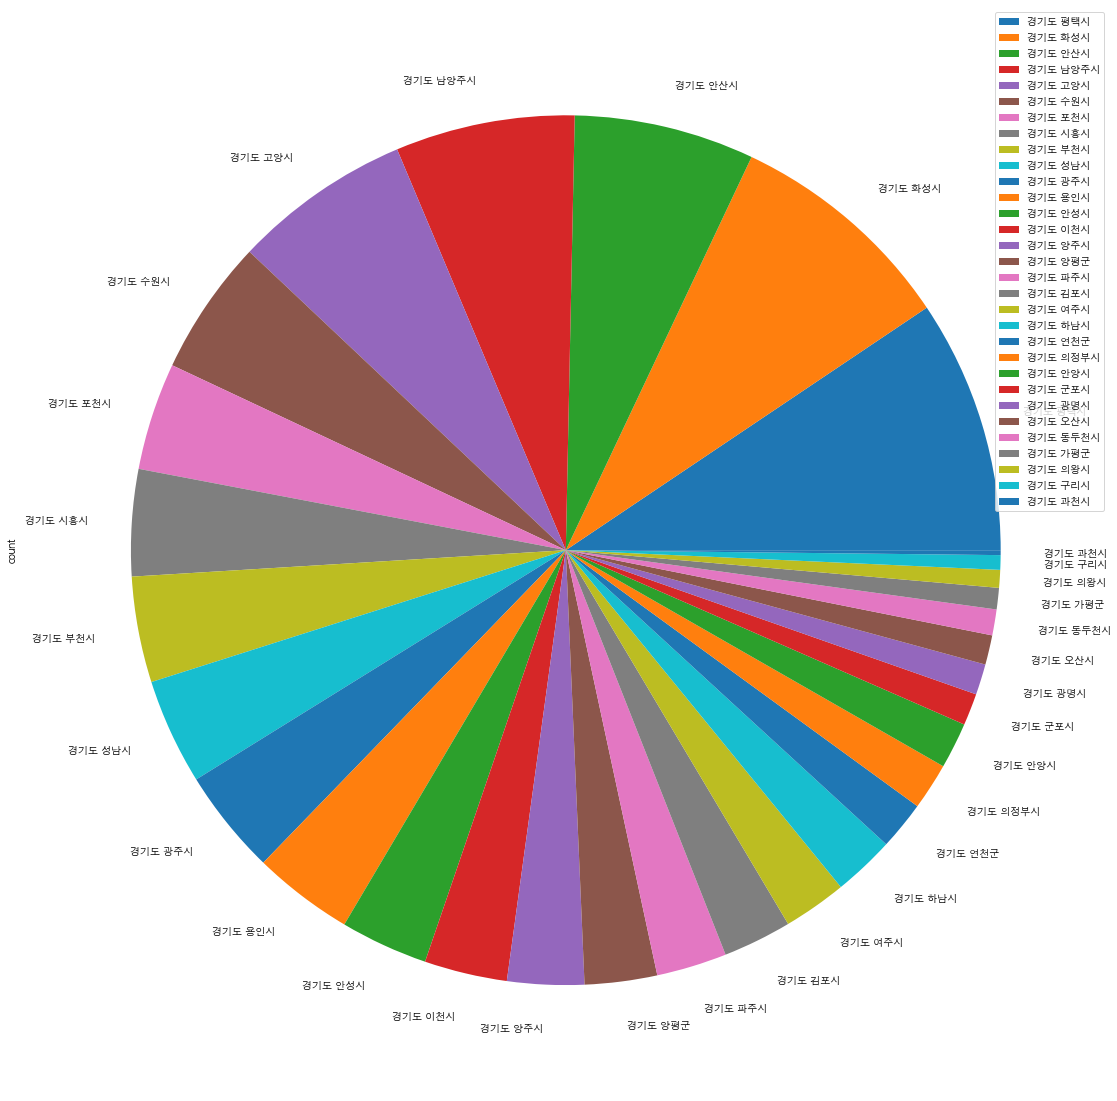

In [13]:
# 파이 차트 그리기

df.set_index('orgNm').plot.pie(y='count', figsize=(20, 20))

plt.show()

In [14]:
# “[개]” kindCd 갯수 세기

sql = '''
SELECT kindCd, COUNT(id) AS count
    FROM animals
    WHERE kindCd LIKE ?
    GROUP BY kindCd
    ORDER BY count DESC
    LIMIT 50
'''

cursor.execute(sql, ['%[개]%'])

rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=rows[0].keys())

df

,kindCd,count
0,[개] 믹스견,44489
1,[개] 말티즈,4098
2,[개] 푸들,3782
3,[개] 진도견,2020
4,[개] 포메라니안,1387
5,[개] 시츄,1197
6,[개] 요크셔 테리어,903
7,[개] 스피츠,754
8,[개] 라브라도 리트리버,651
9,[개] 치와와,641


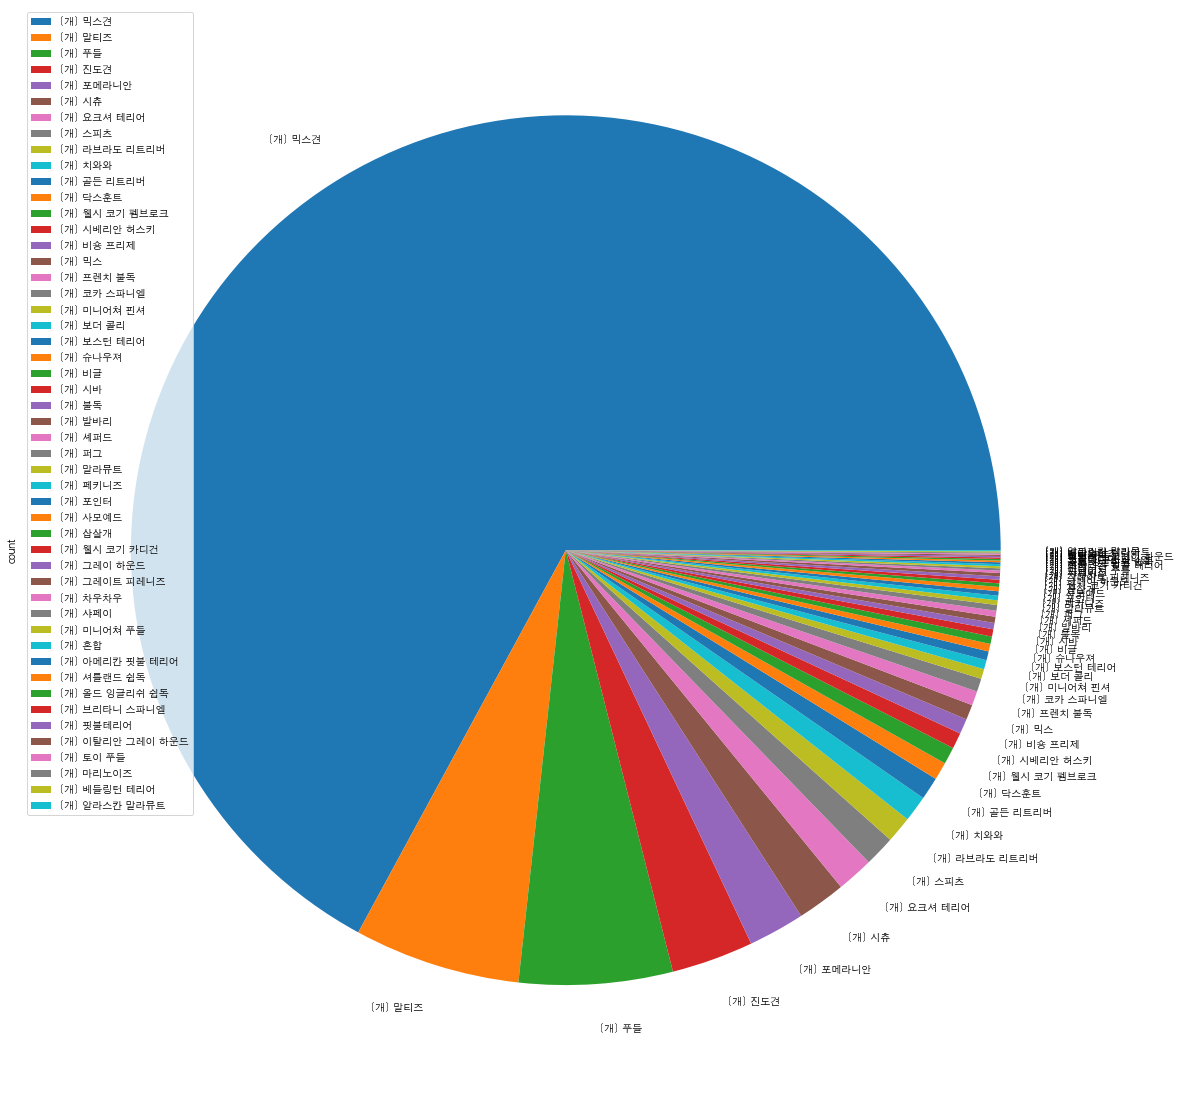

In [15]:
# 파이 차트 그리기

df.set_index('kindCd').plot.pie(y='count', figsize=(20, 20))

plt.show()

## DB 사용 종료

잘 썼습니다! (꾸벅)

In [18]:
connection.close()